In [ ]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the data as a data frame
df = pd.read_csv('INSURANCE_OUTLIER.csv')

In [ ]:
# Displaying first five rows of the data
df.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest


In [ ]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB


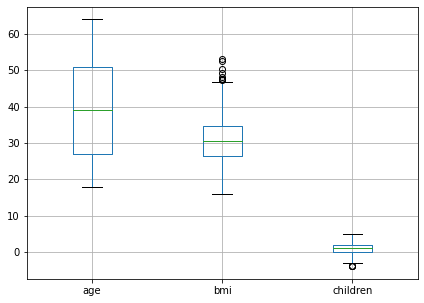

In [ ]:
# Detection of Outliers
df.boxplot(figsize=(7,5));

# a) Upper outliers


Minimum value: 16.0

First quartile value: 26.3

Third quartile value: 34.7

Maximum value: 53.1

Inter-quartile range: 8.400000000000002

Lower bound value: 13.699999999999998

Upper bound value: 47.300000000000004

Outliers are present in bmi attribute


C:\Users\Lappy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


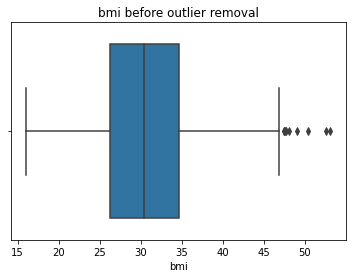

In [ ]:
# Checking the presence of outliers in ‘bmi’

# theoretical verification
sorted(df['bmi']);                        #arranging 'bmi' in ascending order
xsmall=df['bmi'].min()                    #finding the minimum value of 'bmi'
q1,q3=np.percentile(df['bmi'],[25,75])    #finding the quartile values: q1 being the 1st quartile, q3 being the 3rd quartile
xlarge=df['bmi'].max()                    #finding the maximum value of 'bmi'
sns.boxplot(df['bmi']);             # boxplot representation of 'bmi'
plt.title1('bmi before outlier removal')

print('\nMinimum value:',xsmall)
print('\nFirst quartile value:',q1)
print('\nThird quartile value:',q3)
print('\nMaximum value:',xlarge)

iqr=q3-q1                                 #calculating the inter-quartile range
print('\nInter-quartile range:',iqr)

lb=q1-(1.5*iqr)                           #lower bound value is 1.5 times inter-quartile range below q1
ub=q3+(1.5*iqr)                           #Upper bound value is 1.5 times inter-quartile range above q3
print('\nLower bound value:',lb)
print('\nUpper bound value:',ub)

if xsmall < lb or xlarge > ub:
    print(f'\nOutliers are present in bmi attribute')
else:
    print(f'\nOutliers are not present in bmi attribute')

In [ ]:
# Trimming the upper outliers
df1 = df[df['bmi'] < ub]
df1

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest
1334,18,female,31.9,0,no,northeast
1335,18,female,36.9,0,no,southeast
1336,21,female,25.8,0,no,southwest


C:\Users\Lappy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


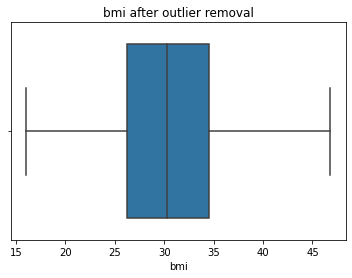

In [ ]:
# Plotting 'bmi' after outlier removal
sns.boxplot(df1['bmi']);
plt.title1('bmi after outlier removal');

# b) Lower outliers

C:\Users\Lappy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(



Minimum value: -4

First quartile value: 0.0

Third quartile value: 2.0

Maximum value: 5

Inter-quartile range: 2.0

Lower bound value: -3.0

Upper bound value: 5.0

Outliers are present in children attribute


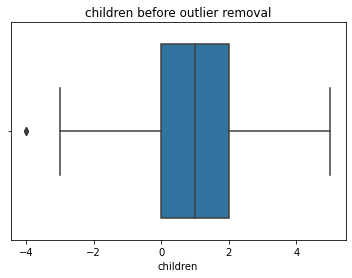

In [ ]:
# Checking the presence of outliers in ‘children’
sns.boxplot(df['children']);             # boxplot representation of 'children' showing the presence of outliers
plt.title1('children before outlier removal')

# theoretical verification
sorted(df['children']);                        #arranging 'children' in ascending order
xsmall=df['children'].min()                    #finding the minimum value of 'children'
q1,q3=np.percentile(df['children'],[25,75])    #finding the quartile values: q1 being the 1st quartile, q3 being the 3rd quartile
xlarge=df['children'].max()                    #finding the maximum value of 'children'

print('\nMinimum value:',xsmall)
print('\nFirst quartile value:',q1)
print('\nThird quartile value:',q3)
print('\nMaximum value:',xlarge)

iqr=q3-q1                                 #calculating the inter-quartile range
print('\nInter-quartile range:',iqr)

lb=q1-(1.5*iqr)                           #lower bound value is 1.5 times inter-quartile range below q1
ub=q3+(1.5*iqr)                           #Upper bound value is 1.5 times inter-quartile range above q3
print('\nLower bound value:',lb)
print('\nUpper bound value:',ub)

if xsmall < lb or xlarge > ub:
    print(f'\nOutliers are present in children attribute')
else:
    print(f'\nOutliers are not present in children attribute')

In [ ]:
# Trimming the lower outliers
df2 = df[df['children'] > lb]
df2

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest
1334,18,female,31.9,0,no,northeast
1335,18,female,36.9,0,no,southeast
1336,21,female,25.8,0,no,southwest


C:\Users\Lappy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


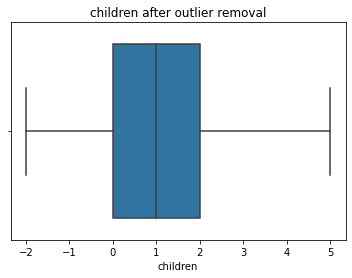

In [ ]:
# Plotting 'children' after outlier removal
sns.boxplot(df2['children'])
plt.title('children after outlier removal');